In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from matplotlib.patches import Polygon
from mplbasketball import Court


def generate_smooth_arc(
    start_x: float,
    start_y: float,
    end_x: float,
    end_y: float,
    center_x: float,
    center_y: float,
    radius: float,
    num_points: int = 100,
) -> list[tuple[float, float]]:
    """
    Generates a smooth arc from (start_x, start_y) to (end_x, end_y) using the given center and radius.

    Parameters:
    - start_x, start_y: Coordinates of the start point of the arc
    - end_x, end_y: Coordinates of the end point of the arc
    - center_x, center_y: Center of the arc
    - radius: Radius of the arc
    - num_points: Number of points for smoothness

    Returns:
    - List of (x, y) coordinates forming the arc
    """
    # Compute the angle of start and end points relative to the center
    theta_start = np.arctan2(start_y - center_y, start_x - center_x)
    theta_end = np.arctan2(end_y - center_y, end_x - center_x)

    # Ensure the arc follows the correct direction
    if theta_start > theta_end:
        theta_start, theta_end = theta_end, theta_start  # Swap angles if needed

    # Generate angles for the arc (ensuring smooth curvature)
    theta = np.linspace(theta_start, theta_end, num_points)

    # Compute the arc points using the circle equation
    arc_x = center_x + radius * np.cos(theta)
    arc_y = center_y + radius * np.sin(theta)

    arc_points = [(start_x, start_y)] + list(zip(arc_x, arc_y)) + [(end_x, end_y)]

    return arc_points


def calculate_arc_points(
    center: tuple[float, float],
    radius: float,
    theta_start: float,
    theta_end: float,
    num_points=100,
):
    """
    Calculate the coordinates of an arc given its center, radius, start and end angles.

    :param center: Tuple (x, y) representing the center of the arc
    :param radius: Radius of the arc
    :param theta_start: Start angle in degrees
    :param theta_end: End angle in degrees
    :param num_points: Number of points to interpolate along the arc
    :return: List of (x, y) coordinates along the arc
    """
    theta = np.linspace(np.radians(theta_start), np.radians(theta_end), num_points)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    return list(zip(x, y))

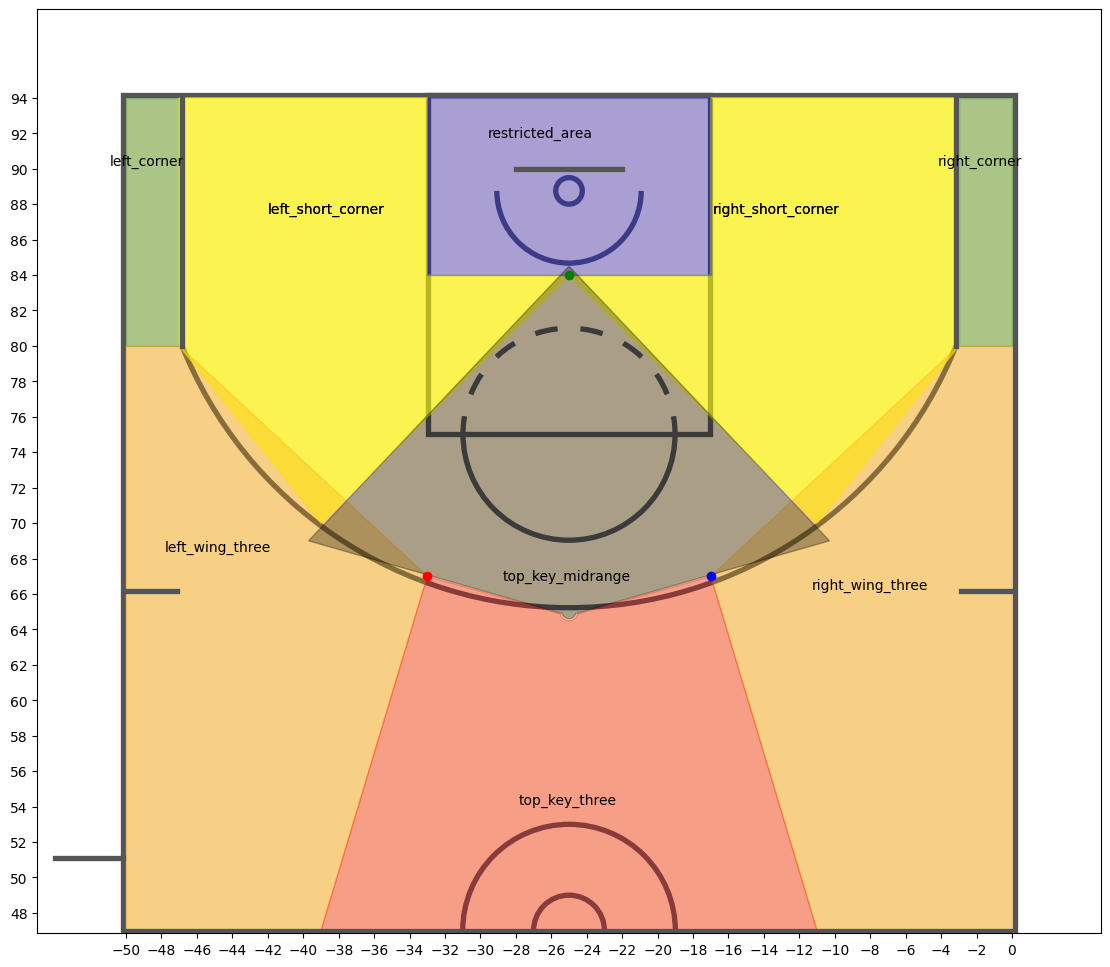

In [ ]:
ORIENTATION = "vu"
ORIGIN = "bottom-left"

X_START, X_END = -50, 0
Y_START, Y_END = 48, 94

TOP_OF_KEY_RADIUS = -0.1


top_key_arc = generate_smooth_arc(
    start_x=X_START + 17,
    start_y=Y_END - 27,
    end_x=X_END - 17,
    end_y=Y_END - 27,
    center_x=-25,
    center_y=Y_END - 29,
    radius=-0.5,
)

top_of_key_midrange_arc = generate_smooth_arc(
    start_x=X_START + 17 - 6.7,
    start_y=Y_END - 25,
    end_x=X_END - 17 + 6.7,
    end_y=Y_END - 25,
    center_x=-25,
    center_y=Y_END - 29,
    radius=-0.4,
)


ax: Axes

court_color = "#f4e4c1"  # Light beige (wood-like color for the court)
line_color = "#555555"  # Dark gray (for court lines)
court = Court(court_type="nba", origin=ORIGIN, units="ft")
fig, ax = plt.subplots(figsize=(18, 12))
court.draw(
    ax,
    court_color=court_color,
    line_color=line_color,
    line_width=0.3,
    orientation=ORIENTATION,
    showaxis=True,
)  # type: ignore


x_ticks = np.arange(X_START, X_END + 2, 2)
y_ticks = np.arange(Y_START, Y_END + 2, 2)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)


zone_map: dict[str, dict[str, list[tuple[float, float]] | str]] = {
    "left_corner": {
        "coords": [
            (X_START, Y_END),
            (X_START + 3, Y_END),
            (X_START + 3, Y_END - 14),
            (X_START, Y_END - 14),
        ],
        "color": "green",
    },
    "left_short_corner": {
        "coords": [
            (X_START + 3, Y_END),
            (X_START + 17, Y_END),
            (X_START + 17, Y_END - 10),
            (-25, Y_END - 10),
            (
                X_START + 17 - 6,
                Y_END - 24,
            ),
            (X_START + 3, Y_END - 14),
        ],
        "color": "yellow",
    },
    "right_corner": {
        "coords": [
            (X_END - 3, Y_END),
            (X_END, Y_END),
            (X_END, Y_END - 14),
            (X_END - 3, Y_END - 14),
        ],
        "color": "green",
    },
    "right_short_corner": {
        "coords": [
            (X_END - 17, Y_END),
            (X_END - 3, Y_END),
            (X_END - 3, Y_END - 14),
            (X_END - 17 + 6, Y_END - 24),
            (-25, Y_END - 10),
            (X_END - 17, Y_END - 10),
        ],
        "color": "yellow",
    },
    "left_wing_three": {
        "coords": [
            (X_START, Y_END - 14),
            (X_START + 3, Y_END - 14),
            (X_START + 17, Y_END - 27),
            (X_START + 17 - 6, Y_START - 1),
            (X_START, Y_START - 2),
        ],
        "color": "orange",
    },
    "right_wing_three": {
        "coords": [
            (X_END - 17, Y_END - 27),
            (X_END - 3, Y_END - 14),
            (X_END, Y_END - 14),
            (X_END, Y_START - 2),
            (X_END - 17 + 6, Y_START - 1),
        ],
        "color": "orange",
    },
    "top_key_three": {
        "coords": [
            *top_key_arc,
            (X_END - 17 + 6, Y_START - 1),
            (X_START + 17 - 6, Y_START - 1),
        ],
        "color": "red",
    },
    "restricted_area": {
        "coords": [
            (X_START + 17, Y_END),
            (X_END - 17, Y_END),
            (X_END - 17, Y_END - 10),
            (X_START + 17, Y_END - 10),
        ],
        "color": "blue",
    },
    "top_key_midrange": {
        "coords": [
            *top_of_key_midrange_arc,
            (-25, Y_END - 9.5),
            # (X_START + 17 - 6.7, Y_END - 25),
            # (X_END - 17 + 6.7, Y_END - 25),
        ],
        "color": "black",
    },
}


def draw_zone(ax: Axes, zone_name, alpha=0.3):
    if zone_name in zone_map:
        zone_info = zone_map[zone_name]
        poly = Polygon(
            zone_info["coords"], closed=True, color=zone_info["color"], alpha=alpha
        )
        ax.add_patch(poly)
        centroid = np.mean(poly.get_xy(), axis=0)
        if zone_name == "top_key_three":
            centroid[1] = centroid[1] - 12
        ax.text(
            centroid[0],
            centroid[1] + 2,
            zone_name,
            color="black",
            fontsize=10,
            ha="center",
            va="center",
        )
    else:
        print(f"Zone '{zone_name}' not found in mapping!")


ax.plot(X_END - 17, Y_END - 27, "bo")
ax.plot(X_START + 17, Y_END - 27, "ro")
ax.plot(-25, Y_END - 10, "go")
# Draw each zone
for zone in zone_map:
    if zone == "right_short_corner" or zone == "left_short_corner":
        draw_zone(ax, zone, 0.4)
    draw_zone(ax, zone)

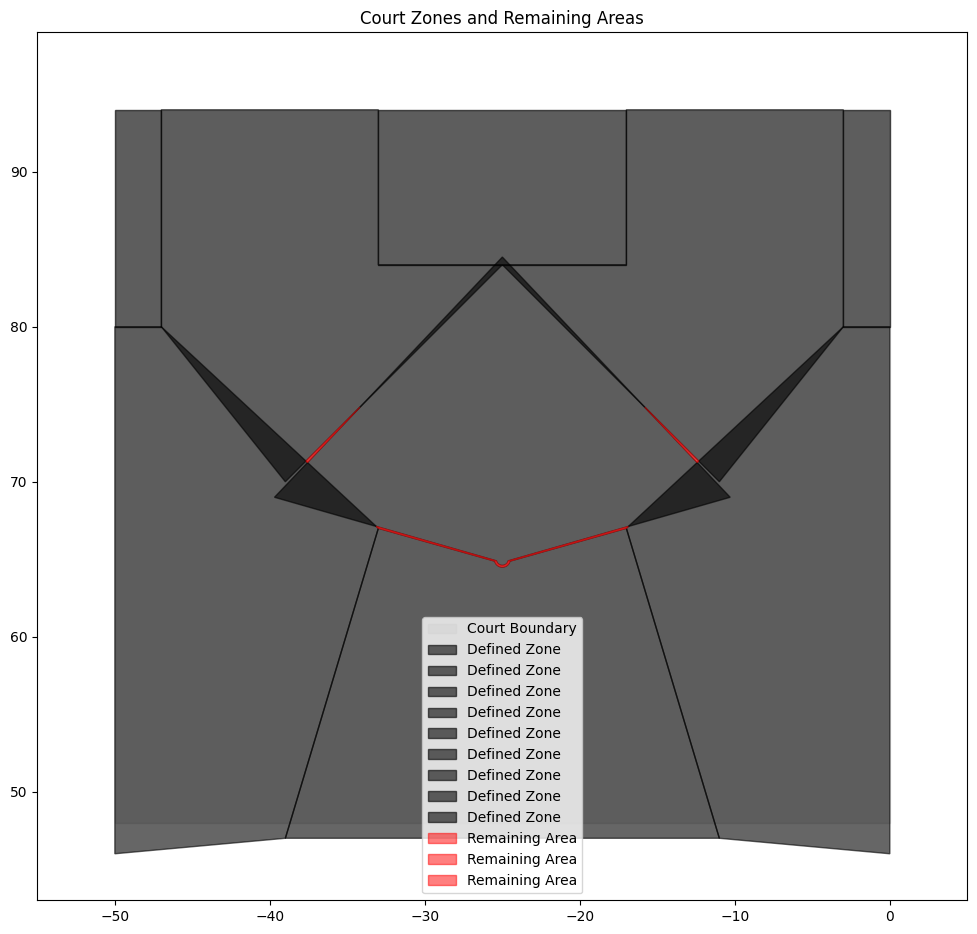

In [ ]:
from shapely.geometry import Polygon as Po
from shapely.ops import unary_union

# Define the bounding box of the court
court_boundary = Po(
    [(X_START, Y_START), (X_END, Y_START), (X_END, Y_END), (X_START, Y_END)]
)

# Create a list of polygons for the zones
zone_polygons = []
for zone in zone_map.values():
    coords = zone["coords"]
    if len(coords) > 2:  # Only valid polygons
        zone_polygons.append(Po(coords))  # type: ignore

# Merge all zones into a single shape
merged_zones = unary_union(zone_polygons)

# Subtract zone areas from court boundary
remaining_area = court_boundary.difference(merged_zones)

# Plot the court and highlight the uncovered areas
fig, ax = plt.subplots(figsize=(12, 18))

# Plot the court boundary
x, y = court_boundary.exterior.xy
ax.fill(x, y, color="lightgrey", alpha=0.5, label="Court Boundary")

# Plot each zone
for zone in zone_polygons:
    x, y = zone.exterior.xy
    ax.fill(x, y, color="black", alpha=0.6, label="Defined Zone")

# Plot the remaining uncovered areas
if remaining_area.geom_type == "Polygon":
    x, y = remaining_area.exterior.xy
    ax.fill(x, y, color="red", alpha=0.5, label="Remaining Area")
elif remaining_area.geom_type == "MultiPolygon":
    for poly in remaining_area.geoms:
        x, y = poly.exterior.xy
        ax.fill(x, y, color="red", alpha=0.5, label="Remaining Area")

# Formatting
ax.set_xlim(X_START - 5, X_END + 5)
ax.set_ylim(Y_START - 5, Y_END + 5)
ax.set_aspect("equal", adjustable="box")
ax.set_title("Court Zones and Remaining Areas")
ax.legend()

# Show the plot
plt.show()

In [31]:
import numpy as np
from matplotlib.patches import RegularPolygon


def add_hex_grid(ax, x_min, x_max, y_min, y_max, side=3.0):
    """
    Adds a non-overlapping flat-topped hexagon grid
    """
    # Calculate correct spacing
    x_spacing = side * np.sqrt(3)
    y_spacing = side * 1.5
    
    y = y_min
    row = 0
    
    while y <= y_max:
        # Offset every other row correctly
        x_offset = x_spacing / 2 if row % 2 else 0
        x = x_min + x_offset
        
        while x <= x_max:
            hex_patch = RegularPolygon(
                (x, y),
                numVertices=6,
                radius=side,
                orientation=np.radians(30),  # Flat-topped
                edgecolor="white",
            
                lw=2.0,
                alpha=0.6,
            )
            ax.add_patch(hex_patch)
            x += x_spacing
        
        y += y_spacing
        row += 1

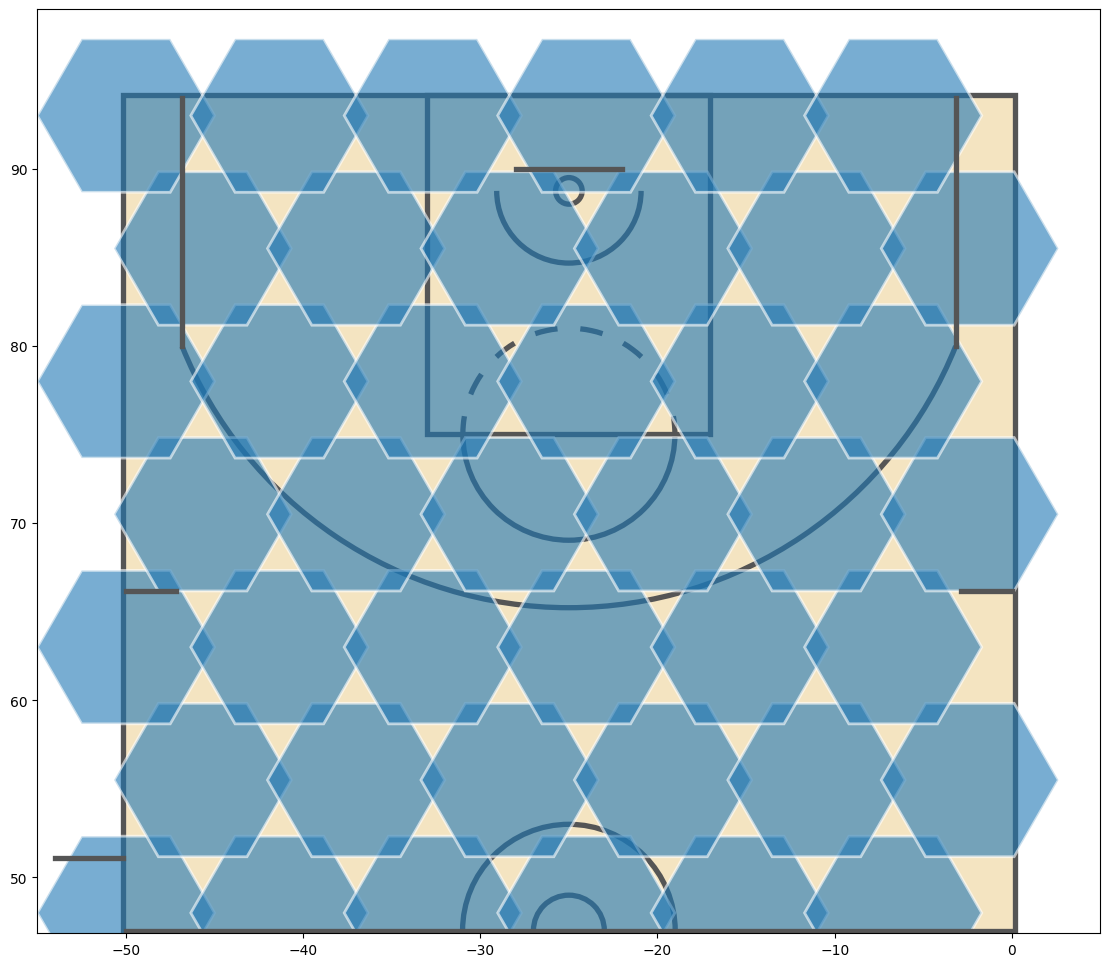

In [ ]:
import matplotlib.pyplot as plt
from mplbasketball import Court

# Court setup (your existing code)
ORIGIN = "bottom-left"
ORIENTATION = "vu"
court_color = "#f4e4c1"
line_color = "#555555"

court = Court(court_type="nba", origin=ORIGIN, units="ft")
fig, ax = plt.subplots(figsize=(18, 12))

# Draw half-court
court.draw(
    ax,
    court_color=court_color,
    line_color=line_color,
    line_width=0.3,
    orientation=ORIENTATION,
    showaxis=True,
)

# Add hex grid (adjust 'side' for bigger or smaller hexes)
add_hex_grid(ax, x_min=-50, x_max=0, y_min=48, y_max=94, side=5.0)

plt.show()

#TODO hexgrid with no overlapps andling offset
#https://stackoverflow.com/questions/59042139/how-to-properly-draw-hexagons-with-offset-coordinates
